In [2]:
import numpy as np
import pandas as pd
import xgboost as xb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()
X = data.data
y = data.target
cols = data.feature_names

# Split data in test & train

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,y)

dTrainMatrix = xb.DMatrix(trainX, trainY)
dTestMatrix = xb.DMatrix(testX, testY)

# Train the Model and Predict

In [6]:
params = {"learning_rate":"0.9", "objective":"reg:linear","n_estimators":"10"}
xb_reg_cl = xb.train(params=params, dtrain=dTrainMatrix)
predictedY = xb_reg_cl.predict(data=dTestMatrix)

# Calculate RMSE

In [7]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testY, predictedY))
print (rmse)

3.951757692001573


# Tune Regularisation parameters 
## Trying L1 regularisation

	- xgboost.cv() would train the model but it does not return the model. It is typically used to find the righ parameters and once those are known we can do regular xgboost.train() and xgboost.predict()

In [11]:
dTrainMatrix = xb.DMatrix(trainX, trainY)
dTestMatrix = xb.DMatrix(testX, testY)

params = {"learning_rate":"0.9", "objective":"reg:linear","n_estimators":"10"}

l1_params = [1,10,100,1000]
rmse = []
for l1 in l1_params:
    params['alpha']=l1
    cv_results = xb.cv(params=params, dtrain=dTrainMatrix, num_boost_round=5, nfold=5, metrics='rmse', as_pandas=True)
    rmse.append(cv_results['test-rmse-std'][4])

print (rmse)

# We see that the RMSE is least when Alpha is 1, so we can use that value


[0.7780018196391573, 1.0095510916079484, 0.9413793071226924, 1.6799027036935918]


In [12]:
params = {"learning_rate":"0.9", "objective":"reg:linear","n_estimators":"10","alpha":"1"}
model = xb.train(params=params, dtrain=dTrainMatrix, num_boost_round=5)
predictedY = model.predict(data=dTestMatrix)

rmse = np.sqrt(mean_squared_error(testY, predictedY))
print (rmse)

4.515664951893516


# Plot Feature Importance

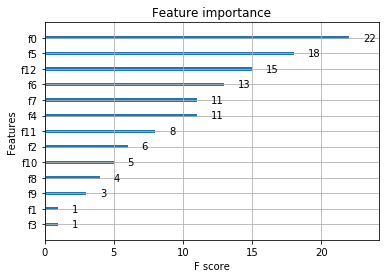

In [13]:
xb.plot_importance(model)